# Atividade 1

Essa atividade consiste em fazer algumas análises sobre mais alguns dados de fatura e pagamento do DataFrame em que estamos trabalhando. Ela será desenvolvida utilizando o dataset resultado do primeiro notebook. Ou seja, os dados aqui já possuem uma primeira organização e ajuste feitos no passo anterior.

Uma vez pegos esses dados, analizaremos as variáveis bill_amt (de 1 à 6) e pay_amt (também de 1 à 6). Essas variáveis representam, respectivamente, o valor da fatura daquele mês e o valor do pagamento daquele mês. As análises feitas foram simples, utilizando dois métodos de visualização: describe (para entender as divisões em quartis de cada coluna) e histogramas (para visualizar de uma forma mais gráfica como essas divisões se dão).

Ao final, os dados de pagamento foram processados em uma escala logarítmica para melhorar a visualização, dado que haviam muitos valores nulos que estavam causando uma certa interferência na visualização final.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
df = pd.read_csv('Data/chapter_1_clean_dataset.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [ ]:
df_payments = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
df_bill_amts = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
df_pay_amts = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

## Análise numérica dos valores das faturas, representadas pelas variáveis Bill_Amt

In [ ]:
df_bill_amts.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


Aqui podemos ver que todos os meses possuem dados negativos. Esses valores não condizem com a expectativa apresentada, uma vez que essas colunas representam os valores pagos no mês. Uma exploração adicional pode ser necessária para tentar entender esses valores.

In [ ]:
for coluna in df_bill_amts.columns:
    print('Coluna: {}'.format(coluna))
    print('Quantidade de valores negativos: {}'.format(sum(df_bill_amts[coluna] < 0)))
    print('Valor proporcional: {0:.2f}%'.format((sum(df_bill_amts[coluna] < 0) / df_bill_amts.shape[0]) * 100))
    print()

Coluna: BILL_AMT1
Quantidade de valores negativos: 518
Valor proporcional: 1.94%

Coluna: BILL_AMT2
Quantidade de valores negativos: 591
Valor proporcional: 2.22%

Coluna: BILL_AMT3
Quantidade de valores negativos: 583
Valor proporcional: 2.19%

Coluna: BILL_AMT4
Quantidade de valores negativos: 597
Valor proporcional: 2.24%

Coluna: BILL_AMT5
Quantidade de valores negativos: 580
Valor proporcional: 2.18%

Coluna: BILL_AMT6
Quantidade de valores negativos: 607
Valor proporcional: 2.28%



In [ ]:
teste = df_bill_amts[(df_bill_amts['BILL_AMT1'] < 0) &
                     (df_bill_amts['BILL_AMT2'] < 0) &
                     (df_bill_amts['BILL_AMT3'] < 0) &
                     (df_bill_amts['BILL_AMT4'] < 0) &
                     (df_bill_amts['BILL_AMT5'] < 0) &
                     (df_bill_amts['BILL_AMT6'] < 0)]

(teste.shape[0] / df_bill_amts.shape[0]) * 100

0.2925292529252925

Aqui vemos, por exemplo, que quase 2% dos dados da coluna BILL_AMT1 são compostos por valores abaixo de 0. Além disso, 78 clinhas possuem todos os valores abaixo de 0, o que representa 0.29% do total

array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>],
       [<AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>],
       [<AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

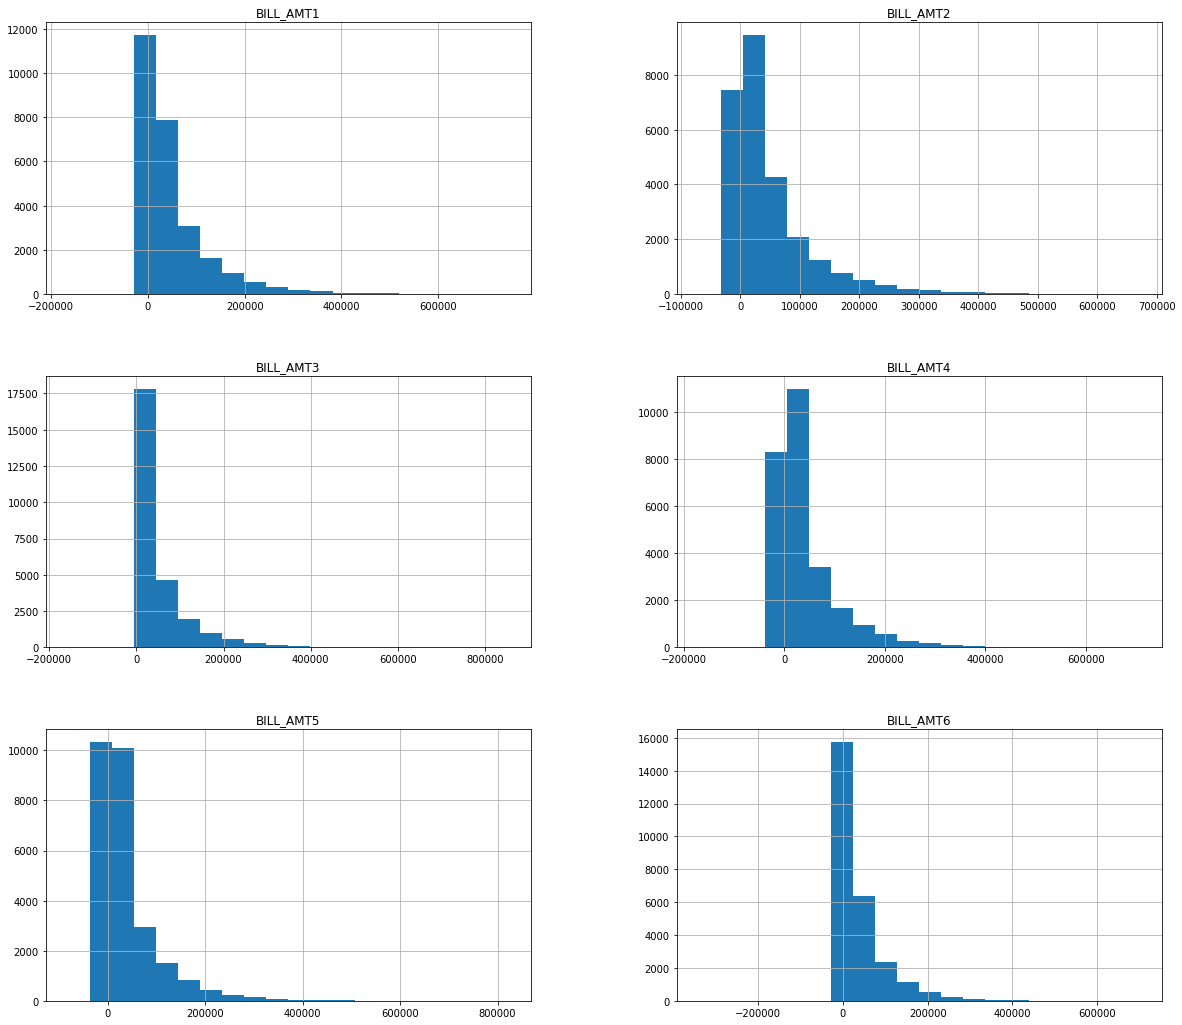

In [ ]:
plt.rcParams["figure.figsize"] = (20, 18)
df_bill_amts.hist(bins = 20)

## Análise numérica dos valores das faturas, representadas pelas variáveis Pay_Amt

In [ ]:
df_pay_amts.describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>],
       [<AxesSubplot:title={'center':'PAY_AMT3'}>,
        <AxesSubplot:title={'center':'PAY_AMT4'}>],
       [<AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

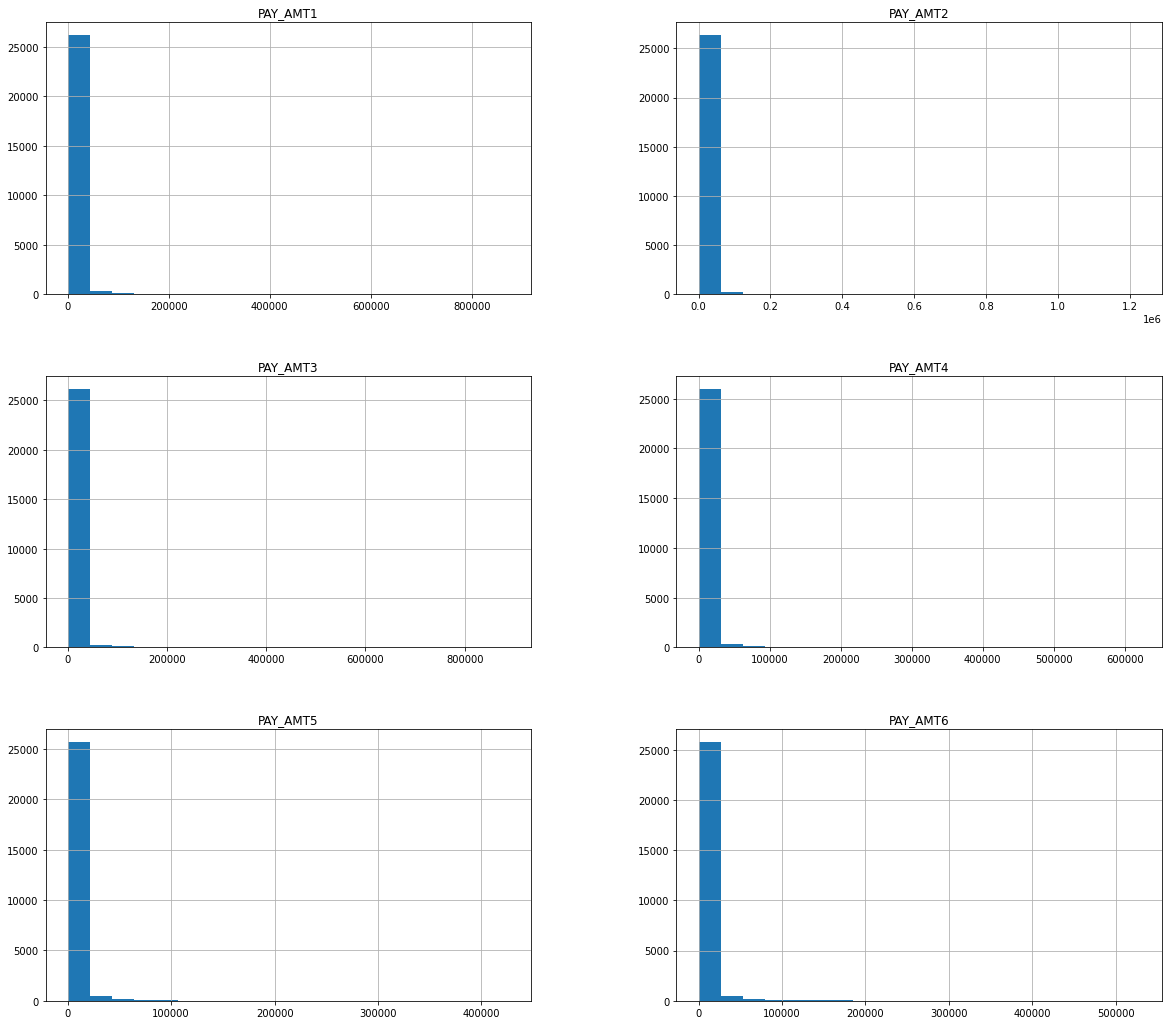

In [ ]:
plt.rcParams["figure.figsize"] = (20, 18)
df_pay_amts.hist(bins = 20)

In [ ]:
null_payment = df_pay_amts == 0
null_payment

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
26659,False,False,False,False,False,False
26660,False,False,False,False,True,True
26661,True,True,False,False,False,False
26662,False,False,False,False,False,False


In [ ]:
null_payment.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

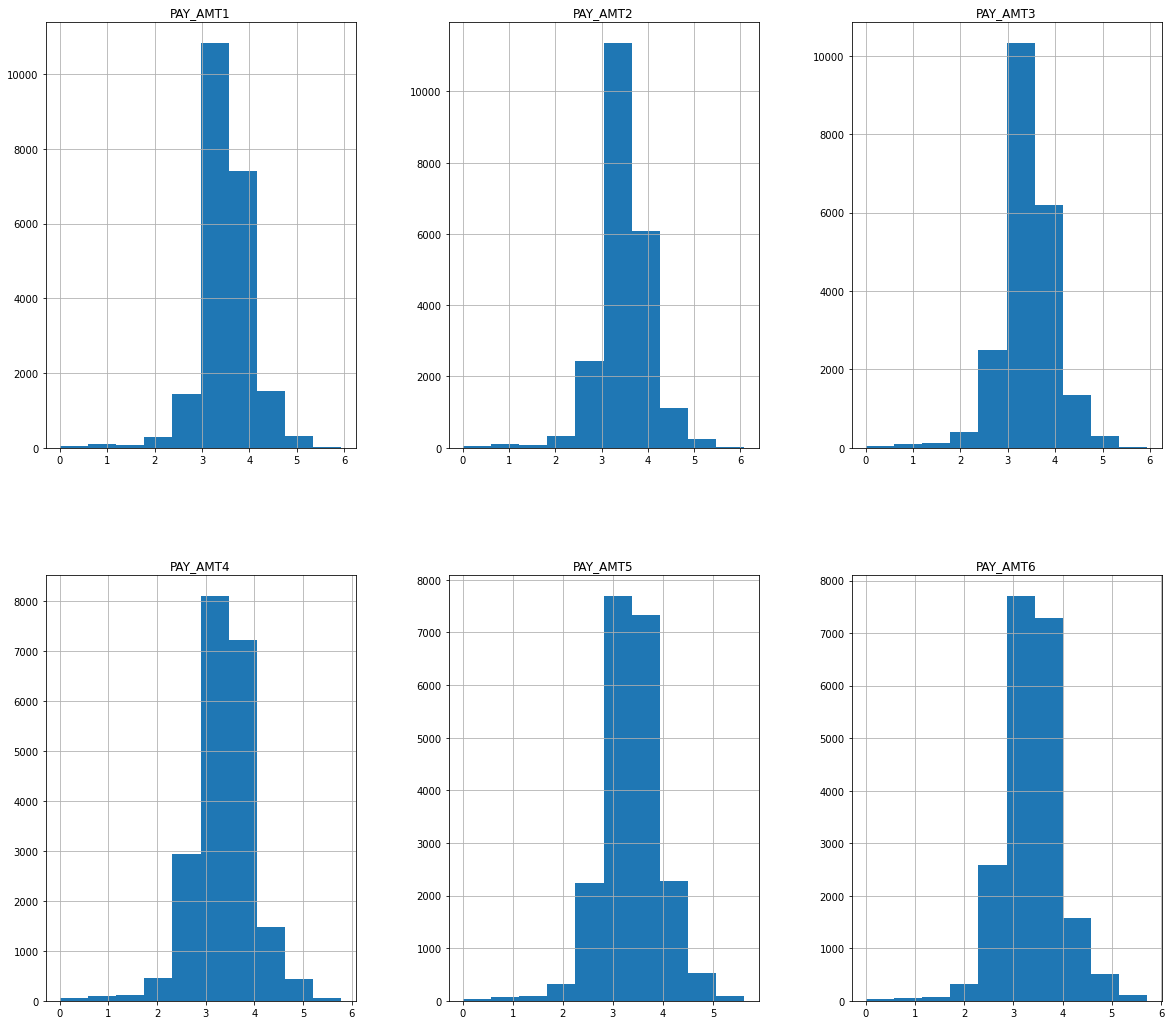

In [ ]:
valores_log = df_pay_amts[~null_payment].apply(np.log10)
valores_log.hist(layout = (2, 3))